<a href="https://colab.research.google.com/github/Khey17/100-Days-Of-ML-Code/blob/main/Learn-PyTorch/01_PyTorch_WorkFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

Let's explore a an example PyTorch end-to-workflow.
Resources:
  * Geound truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
  * Book version of notebook - https://www.learnpytorch.io/01_pytorch_workflow/
  * Ask a question - https://github.com/mrdbourke/pytorch-deep-learning/discussions

## Things to cover

1. Data Preparation
2. Build Model
3. Fitting the model to data (training)
4. Making predictions and evaluating a model (inference)
5. Saving and Loading a model
6. Putting it all together

In [96]:
import torch
from torch import nn  # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.5.1+cu124'

## 1. Data Preparation

Data can be almost anything... in machine learning

* Excel spreadsheet
* Images of any kind
* Videos (YoTube has lots of data)
* Audio like songs or podcasts
* DNA
* Text

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known **parameters**

In [97]:
# Create *known* parameters
weight = 0.7  # arbitrary value
bias = 0.2  # arbitrary value

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2000],
         [0.2140],
         [0.2280],
         [0.2420],
         [0.2560],
         [0.2700],
         [0.2840],
         [0.2980],
         [0.3120],
         [0.3260]]))

In [98]:
len(X), len(y)

(50, 50)

### Splitting the data into training and test sets (one of the most concepts in machine learning in general)

Let's create a train and test split with our data.

In [99]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where data explorer's motto comes in!

"Visualize, visualize, visualize!"

In [100]:
def plot_predictions(train_data=X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions=None):
  '''
  Plots training data, test data and compares predictions.
  '''
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')

  # Plot test data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

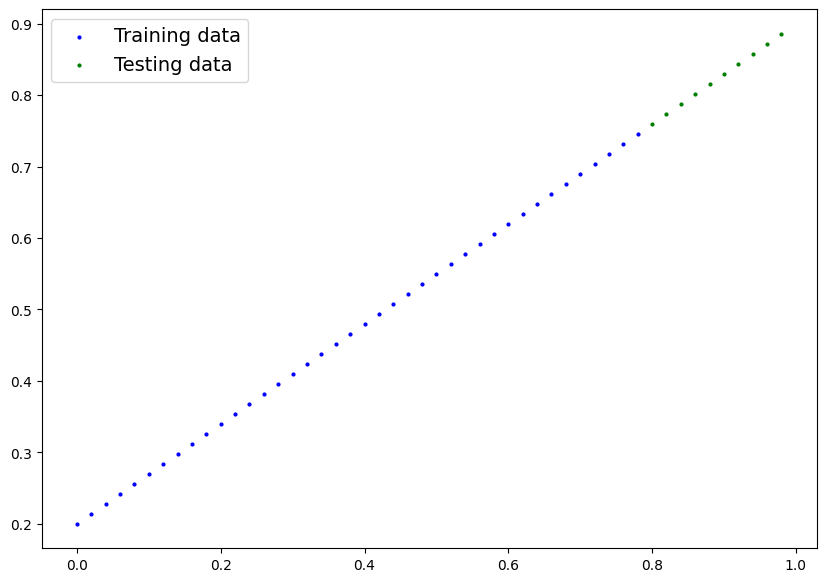

In [101]:
plot_predictions();

## 2. Build model

First PyTorch model!

Let's do it!

What our model does:
  * Start with random values (weights & biases)
  * Look at the training data and adjust the random values to better represent (or to get closer to) the ideal values i.e: y

This happens through two main algorithms:
  * Gradient descent
  * Backpropogration

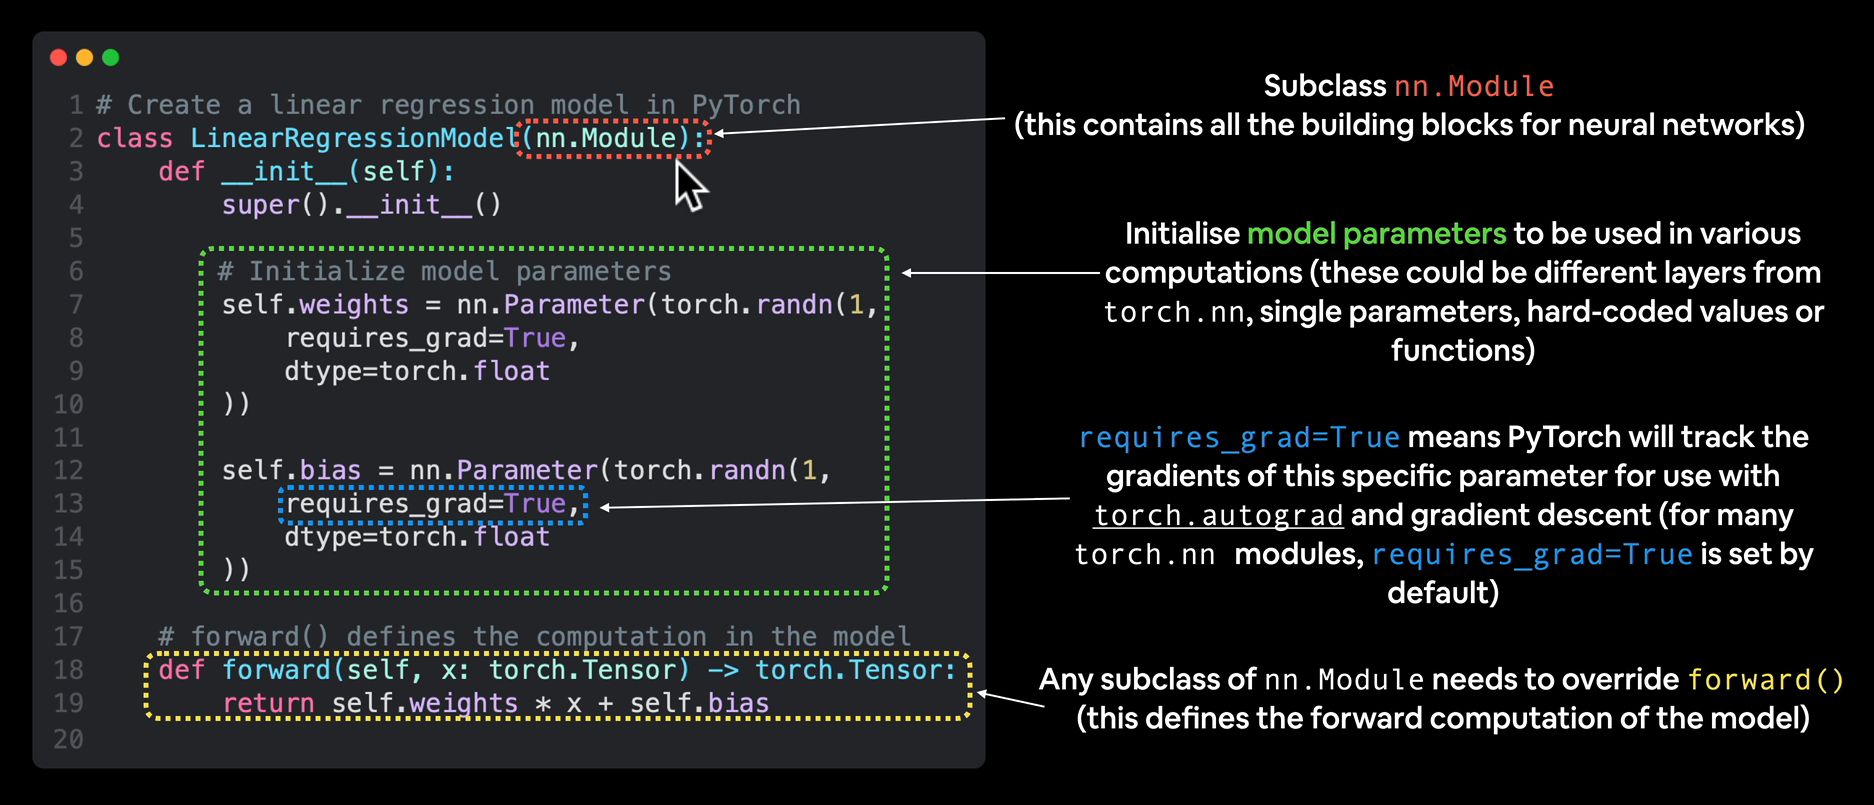

In [102]:
# Create linear regression model class
class LinearRegressionModel(nn.Module):  # nn <- nn is the Base class for almost everything in PyTorch
  def __init__(self):
    super().__init__()
    # Initialize the weights
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward defines the computation
  def forward(self, x: torch.Tensor) -> torch.Tensor:  # 'x' is the input data/training data
    return self.weights * x + self.bias  # linear regression expression

### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered as a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this is where the PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

PyTorch Cheatsheet - https://www.learnpytorch.io/pytorch_cheatsheet/

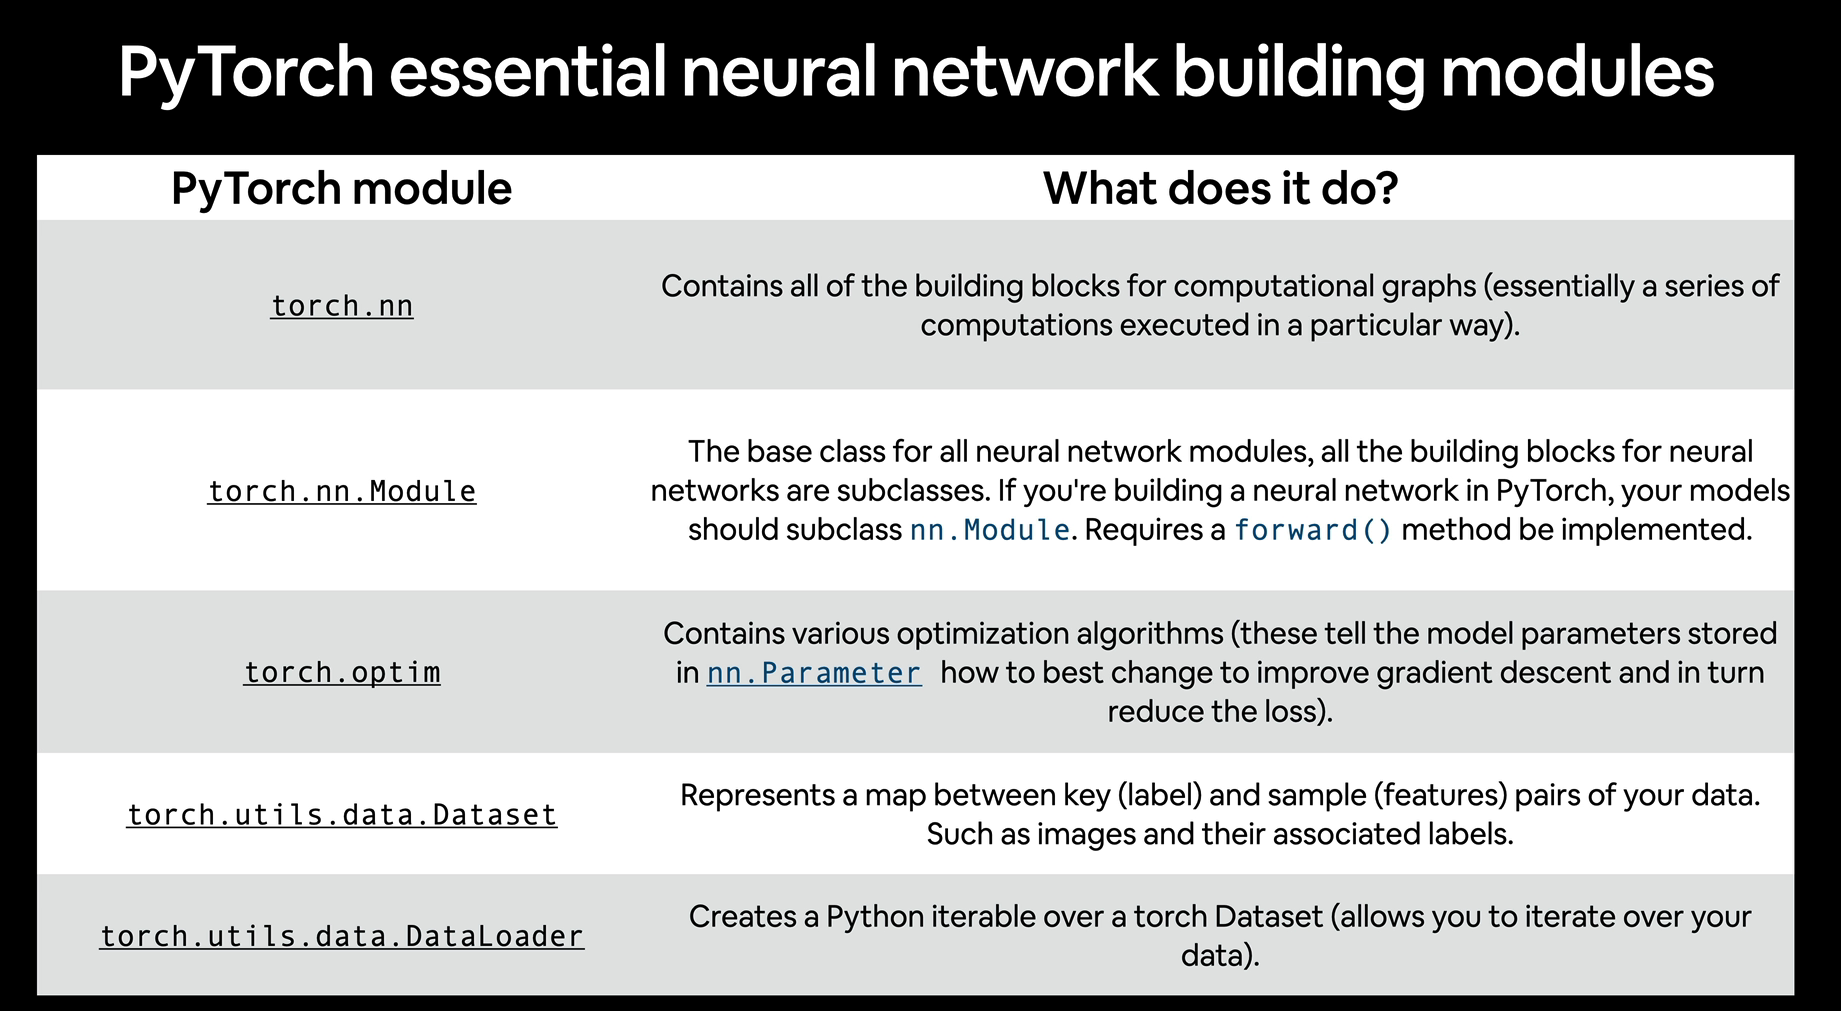

### Checking the contents of our PyTorch model

Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using .parameters().

In [103]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of thye model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [104]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [105]:
weight, bias

(0.7, 0.2)

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts y_test based on x_test.

When we pass data through our model, it's going to run it through the forward() method.

more about inference_mode() - https://x.com/PyTorch/status/1437838231505096708?lang=en

In [106]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

# Alternate method
with torch.no_grad():
  y_preds = model_0( X_test)

y_preds, y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.7600],
         [0.7740],
         [0.7880],
         [0.8020],
         [0.8160],
         [0.8300],
         [0.8440],
         [0.8580],
         [0.8720],
         [0.8860]]))

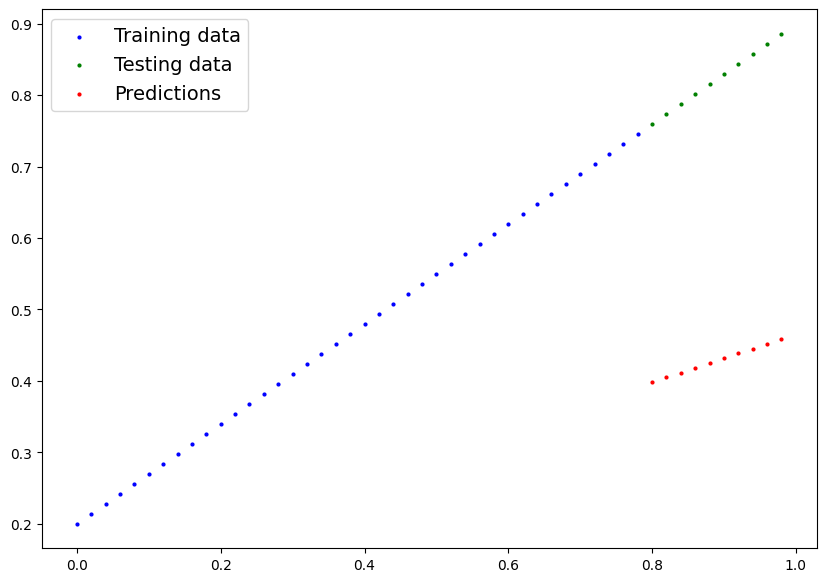

In [107]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

* **Loss Function:** A function to measure how wrong the model's predictions are to the ideal output, lower is better.

* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weights & bias in our case) to improve the loss function.

`torch.optim` - https://pytorch.org/docs/stable/optim.html

And specifically for PyTorch, we need:
  * A training loop
  * A testing loop

In [108]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

### Building a training loop in PyTorch (and a testing loop)

A couple of things we need in training loop:
0. loop through the data
1. Forward pass (this involves data moving through our model's forward (neural network) - also known as forward propogation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards (**backpropogation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [109]:
torch.manual_seed (42)

# An epoch is one loop through the data...
epochs = 10

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train()  # train mode in PyTorch sets all parameters that require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  print(f"Loss: {loss} | Epoch: {epoch}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward - backpropogation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()  # by default how the optimizer changes will accumulate through the loop so... we have to zero (reset) them in step 3

  ### Testing
  model_0.eval()  # turns off gradient tracking

Loss: 0.21288137137889862 | Epoch: 0
Loss: 0.20136037468910217 | Epoch: 1
Loss: 0.18983933329582214 | Epoch: 2
Loss: 0.1783183515071869 | Epoch: 3
Loss: 0.16679733991622925 | Epoch: 4
Loss: 0.1552763283252716 | Epoch: 5
Loss: 0.14375531673431396 | Epoch: 6
Loss: 0.1322343349456787 | Epoch: 7
Loss: 0.12126215547323227 | Epoch: 8
Loss: 0.11188298463821411 | Epoch: 9


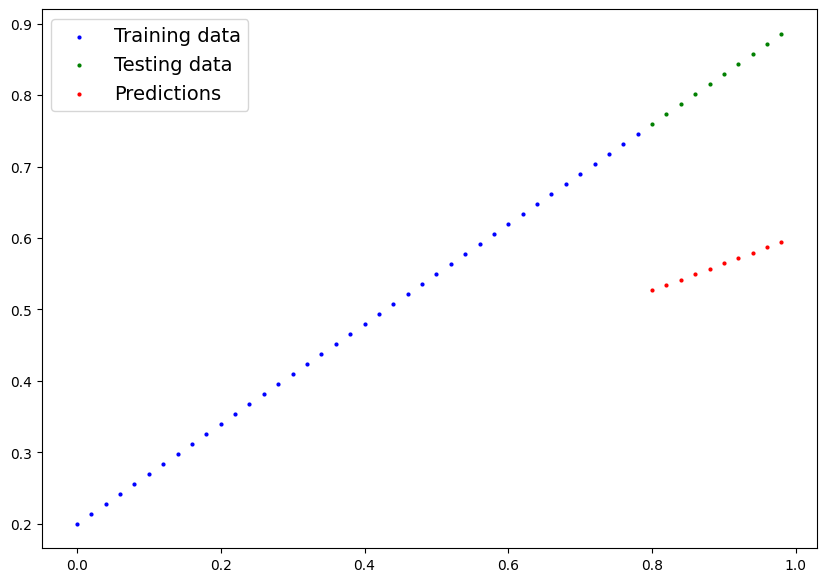

In [110]:
with torch.inference_mode():
  y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)

In [111]:
# Reinstantiate the model
torch.manual_seed(42)
model_0 = LinearRegressionModel()

# Setup the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

# Setup a loss function
loss_fn = nn.L1Loss()

In [112]:
torch.manual_seed (42)

# An epoch is one loop through the data...
epochs = 1000

# Track the model progress
epoch_count = []
loss_values = []
test_loss_values = []

### Training
for epoch in range(1, epochs + 1):

  # Set the model to training mode
  model_0.train()
  # 1. Forward pass
  y_pred = model_0(X_train)
  # 2. Loss function
  loss = loss_fn(y_pred, y_train)

  # 3. Reset the optimizer
  optimizer.zero_grad()
  # 4. backpropogation
  loss.backward()
  # 5. step to local minima
  optimizer.step()

  ### Testing
  model_0.eval()

  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)

  # printing out the results
  if epoch % 100 == 0:
    # record the results
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    print(model_0.state_dict())

Epoch: 100 | Loss: 0.028308561071753502 | Test loss: 0.06553301960229874
OrderedDict([('weights', tensor([0.5609])), ('bias', tensor([0.2583]))])
Epoch: 200 | Loss: 0.007258452475070953 | Test loss: 0.008202021941542625
OrderedDict([('weights', tensor([0.6921])), ('bias', tensor([0.1988]))])
Epoch: 300 | Loss: 0.007258452475070953 | Test loss: 0.008202021941542625
OrderedDict([('weights', tensor([0.6921])), ('bias', tensor([0.1988]))])
Epoch: 400 | Loss: 0.007258452475070953 | Test loss: 0.008202021941542625
OrderedDict([('weights', tensor([0.6921])), ('bias', tensor([0.1988]))])
Epoch: 500 | Loss: 0.007258452475070953 | Test loss: 0.008202021941542625
OrderedDict([('weights', tensor([0.6921])), ('bias', tensor([0.1988]))])
Epoch: 600 | Loss: 0.007258452475070953 | Test loss: 0.008202021941542625
OrderedDict([('weights', tensor([0.6921])), ('bias', tensor([0.1988]))])
Epoch: 700 | Loss: 0.007258452475070953 | Test loss: 0.008202021941542625
OrderedDict([('weights', tensor([0.6921])), (

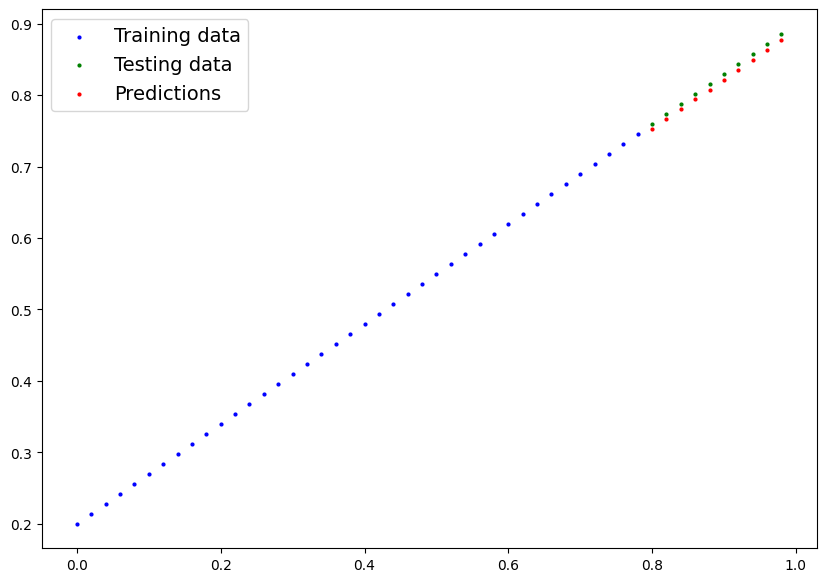

In [113]:
with torch.inference_mode():
  y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)

In [114]:
type(loss_values)

list

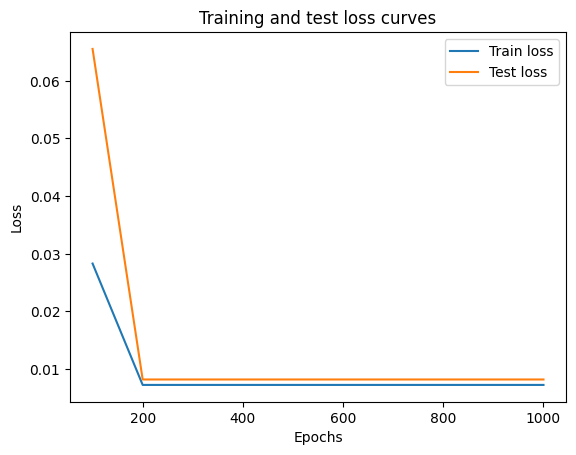

In [115]:
# Plot the loss curve
plt.plot(epoch_count, torch.tensor(loss_values).detach().numpy(), label="Train loss")
plt.plot(epoch_count, torch.tensor(test_loss_values).detach().numpy(), label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show();

## Saving a model in PyTorch

There are three main methods for saving and loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict() - allows you to load a model's saved state dictionary

In [116]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6921])), ('bias', tensor([0.1988]))])

In [117]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create a model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create a model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


### Saving models to Google Drive

In [118]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [119]:
# Make drive path in the working directory
drive_path = Path("/content/drive/MyDrive/Learn-PyTorch/models")
drive_path.mkdir(parents=True, exist_ok=True)

drive_model_name = "01_pytorch_workflow_model_0.pth"
drive_model_path = drive_path / drive_model_name

# Save the model
print(f"Saving model to: {drive_model_path}")
torch.save(obj=model_0.state_dict(), f=drive_model_path)

Saving model to: /content/drive/MyDrive/Learn-PyTorch/models/01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

Since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [120]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6921])), ('bias', tensor([0.1988]))])

In [121]:
# load in a saved state_dict we have to instantiate a new  instance of our model class
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-121-9ac1cc7781e1>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [122]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6921])), ('bias', tensor([0.1988]))])

In [123]:
# Make predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.7525],
        [0.7663],
        [0.7802],
        [0.7940],
        [0.8079],
        [0.8217],
        [0.8356],
        [0.8494],
        [0.8632],
        [0.8771]])

In [124]:
y_preds

tensor([[0.7525],
        [0.7663],
        [0.7802],
        [0.7940],
        [0.8079],
        [0.8217],
        [0.8356],
        [0.8494],
        [0.8632],
        [0.8771]])

In [125]:
# Compare loaded model preds with original model preds
torch.eq(loaded_model_preds, y_preds)

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's backtrack and see it all in one place

In [152]:
# import PyTorch and matplotlib
import torch
from torch import nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# GPU availability
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

Device: cpu


### 6.1 Data

In [228]:
# known parameters
w = 0.9
b = 0.3

# Generate random data in torch seed setting
torch.manual_seed(17)

X = torch.arange(0, 1, 0.001).unsqueeze(dim=1)
y = w * X + b

print(X[:10], y[:10])

tensor([[0.0000],
        [0.0010],
        [0.0020],
        [0.0030],
        [0.0040],
        [0.0050],
        [0.0060],
        [0.0070],
        [0.0080],
        [0.0090]]) tensor([[0.3000],
        [0.3009],
        [0.3018],
        [0.3027],
        [0.3036],
        [0.3045],
        [0.3054],
        [0.3063],
        [0.3072],
        [0.3081]])


### 6.2 Split the data

In [229]:
# splitting the data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

### 6.3 Build the model

In [230]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)
    # Activation layer
    self.activation = nn.ReLU()

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [231]:
# initialize the model and make some initial predictions
torch.manual_seed(17)
model_1 = LinearRegressionModelV2()

print(list(model_1.parameters()))

[Parameter containing:
tensor([[-0.1315]], requires_grad=True), Parameter containing:
tensor([0.0702], requires_grad=True)]


In [232]:
# eval
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[-0.0350],
        [-0.0351],
        [-0.0353],
        [-0.0354],
        [-0.0355],
        [-0.0357],
        [-0.0358],
        [-0.0359],
        [-0.0360],
        [-0.0362],
        [-0.0363],
        [-0.0364],
        [-0.0366],
        [-0.0367],
        [-0.0368],
        [-0.0370],
        [-0.0371],
        [-0.0372],
        [-0.0374],
        [-0.0375],
        [-0.0376],
        [-0.0378],
        [-0.0379],
        [-0.0380],
        [-0.0382],
        [-0.0383],
        [-0.0384],
        [-0.0385],
        [-0.0387],
        [-0.0388],
        [-0.0389],
        [-0.0391],
        [-0.0392],
        [-0.0393],
        [-0.0395],
        [-0.0396],
        [-0.0397],
        [-0.0399],
        [-0.0400],
        [-0.0401],
        [-0.0403],
        [-0.0404],
        [-0.0405],
        [-0.0407],
        [-0.0408],
        [-0.0409],
        [-0.0410],
        [-0.0412],
        [-0.0413],
        [-0.0414],
        [-0.0416],
        [-0.0417],
        [-0.

In [233]:
# visualize the preds
def plot_predictions(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, predictions=None):
  """
  Plots the training data and predictions
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(X_train, y_train, c="b", s=4, label="Training_Data")
  plt.scatter(X_test, y_test, c="g", s=4, label="Test_Data")
  if predictions is not None:
    plt.scatter(X_test, predictions, c="r", s=4, label="Predictions")
  plt.legend(prop={"size": 14})
  plt.xlabel("X")
  plt.ylabel("y")
  plt.show()

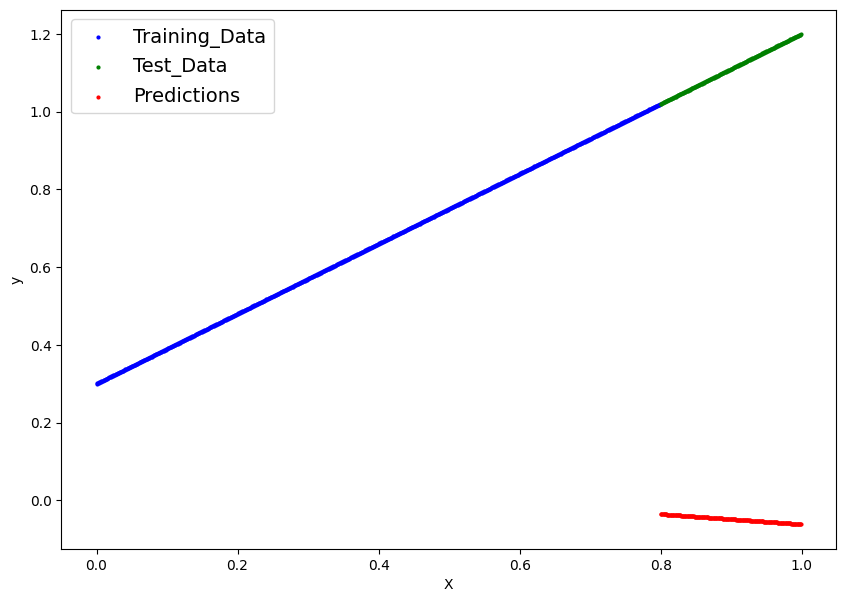

In [234]:
plot_predictions(X_train, y_train, X_test, y_test, predictions=y_preds)

### 6.4 Train model

* Loss Function
* Optimizer
* Training Loop

In [246]:
# Setup the parameters
torch.manual_seed(17)

# Setup the model
model_1 = LinearRegressionModelV2()

# Loss function
loss_fn = nn.L1Loss()

# Optimizer
optimizer = optim.SGD(params=model_1.parameters(), lr=0.01)

model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.1315]])),
             ('linear_layer.bias', tensor([0.0702]))])

In [247]:
# functionizing the train model
def train_model(model, X_train, y_train, X_test, y_test, loss_fn=loss_fn,
                optimizer=optimizer, epochs=100, lr=0.01):
  """
  Trains a PyTorch model with default epochs of 100.
  """
  # Track the model progress
  epoch_count = []
  loss_values = []
  test_loss_values = []

  ### Training
  # 0. loop through the data
  for epoch in range(1, epochs + 1):
    # 1. Setup the training mode
    model.train()
    # 2. feed forward
    y_pred = model(X_train)
    # 3. calculate the loss
    loss = loss_fn(y_pred, y_train)
    loss_values.append(loss)
    # 4. reset the optimizer
    optimizer.zero_grad()
    # 5. back propogation
    loss.backward()
    # 6. optimizer step
    optimizer.step()
    # 7. evaluate
    model.eval()
    with torch.inference_mode():
      test_pred = model(X_test)
      test_loss = loss_fn(test_pred, y_test)
      test_loss_values.append(test_loss)

    # printing out the results
    epoch_count.append(epoch)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

  return epoch_count, loss_values, test_loss_values

In [248]:
# train the model using the function
history_1 = train_model(model=model_1, X_train=X_train, y_train=y_train,
                      X_test=X_test, y_test=y_test, epochs=500)

Epoch: 10 | Loss: 0.5375080704689026 | Test loss: 1.0216957330703735
Epoch: 20 | Loss: 0.4215480089187622 | Test loss: 0.8857607245445251
Epoch: 30 | Loss: 0.31400248408317566 | Test loss: 0.7554850578308105
Epoch: 40 | Loss: 0.2443179488182068 | Test loss: 0.6488243937492371
Epoch: 50 | Loss: 0.20225858688354492 | Test loss: 0.5643848180770874
Epoch: 60 | Loss: 0.177259624004364 | Test loss: 0.4986811876296997
Epoch: 70 | Loss: 0.16231341660022736 | Test loss: 0.4482617974281311
Epoch: 80 | Loss: 0.1529863178730011 | Test loss: 0.40970882773399353
Epoch: 90 | Loss: 0.14666958153247833 | Test loss: 0.3802994191646576
Epoch: 100 | Loss: 0.14187544584274292 | Test loss: 0.3575090765953064
Epoch: 110 | Loss: 0.13782899081707 | Test loss: 0.3395203649997711
Epoch: 120 | Loss: 0.1341319978237152 | Test loss: 0.32483795285224915
Epoch: 130 | Loss: 0.13059444725513458 | Test loss: 0.3124517798423767
Epoch: 140 | Loss: 0.12712787091732025 | Test loss: 0.301579087972641
Epoch: 150 | Loss: 0.123

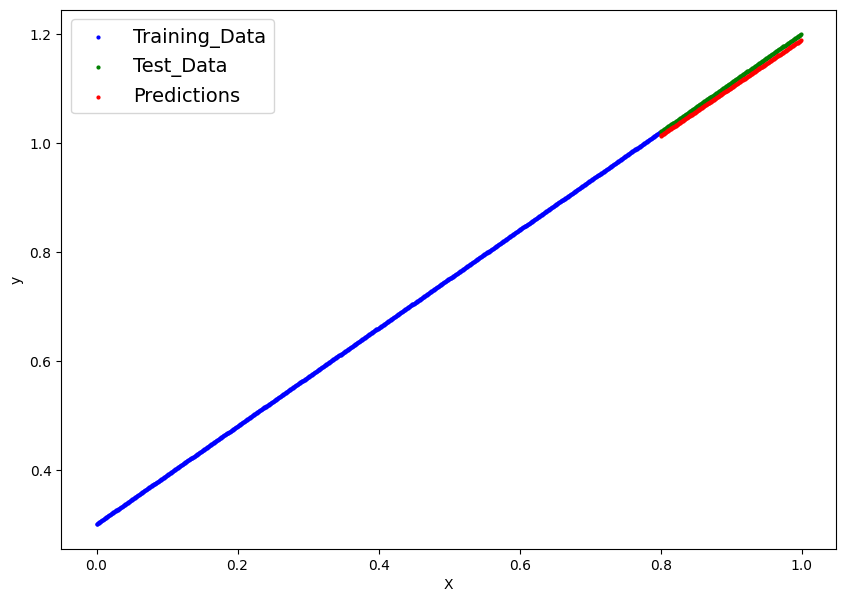

In [249]:
# visualize the predictions
with torch.inference_mode():
  y_preds = model_1(X_test)

plot_predictions(X_train, y_train, X_test, y_test, predictions=y_preds)

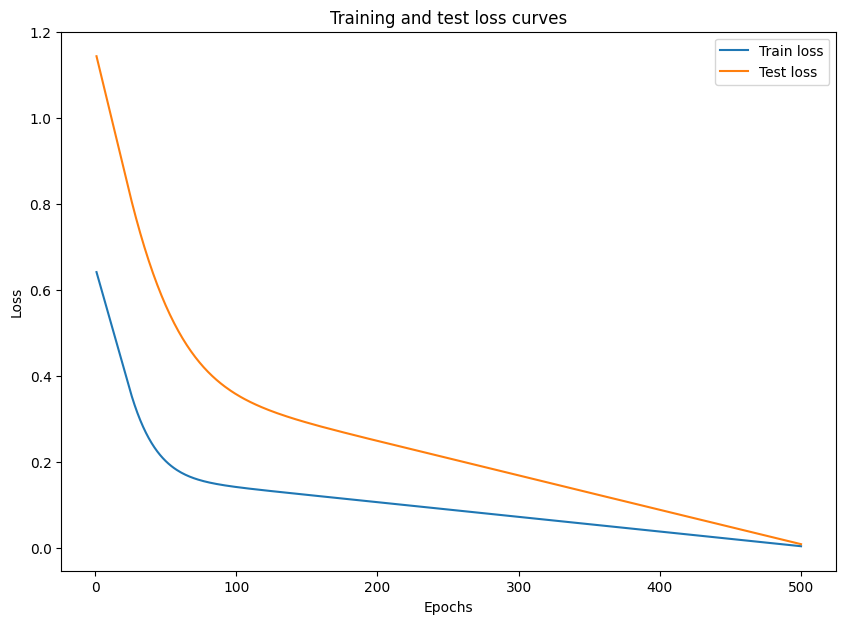

In [250]:
# visualize history
plt.figure(figsize=(10, 7))
plt.plot(history_1[0], torch.tensor(history_1[1]).detach().numpy(), label="Train loss")
plt.plot(history_1[0], torch.tensor(history_1[2]).detach().numpy(), label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show();

In [251]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8811]])),
             ('linear_layer.bias', tensor([0.3081]))])

### 6.5 Saving the model

In [252]:
# save the model in drive
path = Path("/content/drive/MyDrive/Learn-PyTorch/models")
path.mkdir(parents=True, exist_ok=True)

model_name = '01_pytorch_workflow_model_1.pth'
model_save_path = path / model_name

print(f"Saving model to: {model_save_path}")
torch.save(obj=model_1.state_dict(), f=model_save_path)

Saving model to: /content/drive/MyDrive/Learn-PyTorch/models/01_pytorch_workflow_model_1.pth


### 6.6 Load the saved model

In [253]:
# load the state_dict of the model
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(f=model_save_path))

# verify the preds
with torch.inference_mode():
  loaded_preds = loaded_model_1(X_test)

torch.eq(y_preds, loaded_preds)

<ipython-input-253-d90db620db43>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(f=model_save_path))


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        